# 2D Case

In [1]:
from core.runner import Runner
import tensorflow as tf

grid_dim = 2
grid_length = 8

learning_rate_schedule = {
    "initial_learning_rate": 0.0005,
    "decay_steps": 1e4,
    "decay_rate": 0.1,
    "staircase": True
}

runner = Runner(
    grid_dimension=grid_dim, grid_length=grid_length,
    main_layer_hidden_nodes=[30, 20],
    branch1_hidden_nodes=[10],
    branch2_hidden_nodes=[10],
    learning_rate_schedule=learning_rate_schedule,
    exploration_rate=0.5,
)

2022-12-08 15:25:18.781639: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import time

batch_size = tf.constant(500)
n_iterations = tf.constant(int(2.5e4))
check_loss_every_n_iterations = tf.constant(int(1e3))

start = time.time()
ave_losses = runner.train_agent(batch_size, n_iterations, check_loss_every_n_iterations)
time_elapsed = time.time() - start
print(f"Time Elapsed: {time_elapsed} s")

Iteration: 0 Average Loss: 10.6336031
Iteration: 1000 Average Loss: 2.42582631
Iteration: 2000 Average Loss: 1.48780596
Iteration: 3000 Average Loss: 0.91204
Iteration: 4000 Average Loss: 0.484962851
Iteration: 5000 Average Loss: 0.250500262
Iteration: 6000 Average Loss: 0.0884450302
Iteration: 7000 Average Loss: 0.0247304067
Iteration: 8000 Average Loss: 0.00311274664
Iteration: 9000 Average Loss: 0.000120283708
Iteration: 10000 Average Loss: 2.17718775e-06
Iteration: 11000 Average Loss: 1.24223016e-06
Iteration: 12000 Average Loss: 9.35663707e-07
Iteration: 13000 Average Loss: 4.84155862e-07
Iteration: 14000 Average Loss: 1.85326073e-07
Iteration: 15000 Average Loss: 5.30718687e-08
Iteration: 16000 Average Loss: 1.30785827e-08
Iteration: 17000 Average Loss: 5.53772761e-09
Iteration: 18000 Average Loss: 4.22892311e-11
Iteration: 19000 Average Loss: 2.94649594e-09
Iteration: 20000 Average Loss: 3.83777262e-07
Iteration: 21000 Average Loss: 1.18762953e-12
Iteration: 22000 Average Loss: 

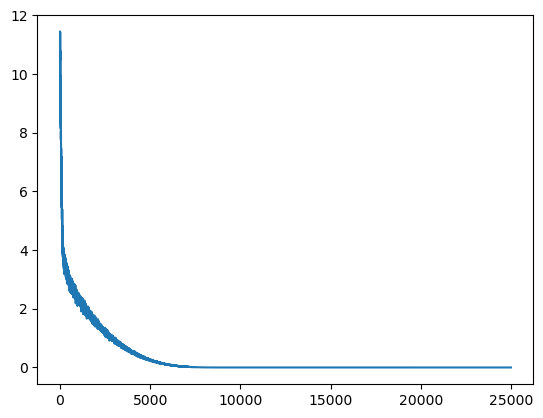

In [3]:
import matplotlib.pyplot as plt

plt.plot(ave_losses.numpy())

In [4]:
batch_size = tf.constant(5000)

agent_distr = runner.get_normalized_agent_sample_distribution(batch_size)

n_unique_samples = tf.shape(tf.where(agent_distr))[0]
frac_unique_coords = n_unique_samples / (grid_length ** grid_dim)
print(f"Percentage of coordinates sampled uniquely: {float(frac_unique_coords*100):.2f}%")

agent_distr

Percentage of coordinates sampled uniquely: 45.31%


<tf.Tensor: shape=(8, 8), dtype=float32, numpy=
array([[0.0564, 0.0468, 0.    , 0.    , 0.0002, 0.    , 0.046 , 0.0486],
       [0.0534, 0.1004, 0.    , 0.0002, 0.    , 0.    , 0.0926, 0.05  ],
       [0.0002, 0.    , 0.    , 0.    , 0.0002, 0.0002, 0.0002, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0002],
       [0.0002, 0.    , 0.    , 0.0004, 0.0002, 0.    , 0.0002, 0.    ],
       [0.0002, 0.    , 0.    , 0.    , 0.    , 0.0002, 0.    , 0.    ],
       [0.0486, 0.0926, 0.    , 0.    , 0.    , 0.    , 0.0932, 0.0538],
       [0.0506, 0.0576, 0.    , 0.    , 0.    , 0.    , 0.0506, 0.056 ]],
      dtype=float32)>

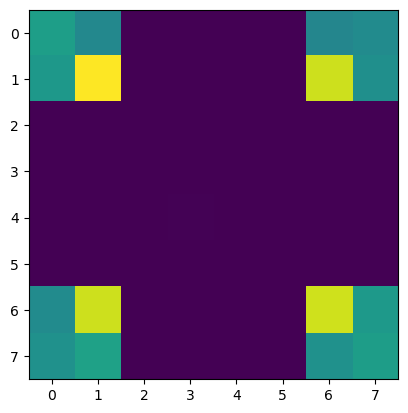

In [5]:
plt.imshow(agent_distr.numpy())

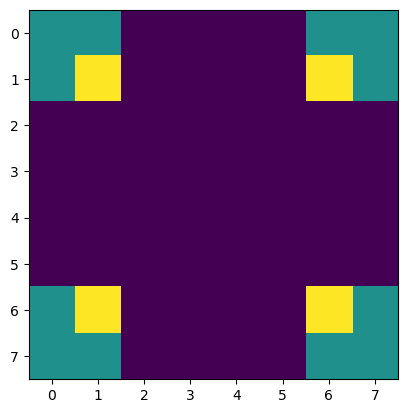

In [6]:
env_distr = runner.env.rewards / tf.math.reduce_sum(runner.env.rewards)

plt.imshow(env_distr.numpy())

In [1]:
from core.runner import Runner
import tensorflow as tf
import time
import matplotlib.pyplot as plt

import numpy as np

def _plot_l1_errors_per_probability_interval(agent_prob, env_prob, 
#                                              filename, 
                                             n_intervals
                                            ):
    result = agent_prob.ravel()
    expected = env_prob.ravel()
    max_expected = expected.max()
    expected_pcts = expected * 100 / max_expected

    interval_edges = np.linspace(0, 100, n_intervals + 1)
    starts = interval_edges[:-1]
    ends = interval_edges[1:]

    frac_l1_errors = np.abs(result - expected) / max_expected
    errors = []
    labels = []
    for s, e in zip(starts, ends):
        inds = np.where((s < expected_pcts) & (expected_pcts <= e))
        errors_per_interval = frac_l1_errors[inds]
        if len(errors_per_interval):
            interval_label = f"{s:.2f}% < pct <= {e:.2f}%"
            errors.append(errors_per_interval)
            labels.append(interval_label)

#     print(errors)
    fig, ax = plt.subplots()
    ax.violinplot(errors)
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels, rotation=15)
    ax.set_ylim(0, 1.0)
    ax.set_ylabel("Fractional L1 Errors")
    ax.set_xlabel("Percentage of max theoretical probability")
    plt.tight_layout()
#     fig.savefig(f"./plot_results/{filename}")
    return errors

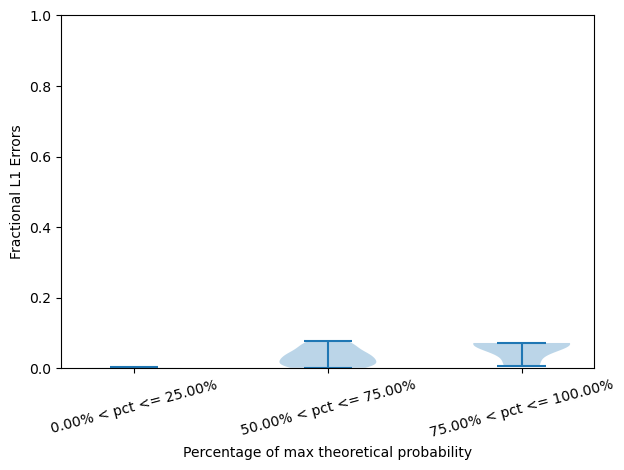

In [8]:
errors = _plot_l1_errors_per_probability_interval(
    agent_distr.numpy(), env_distr.numpy(), n_intervals=4
)

# 5D Case

In [2]:
grid_dim = 5
grid_length = 8

# learning_rate_schedule = {
#     "initial_learning_rate": 0.0005,
#     "decay_steps": 1.5e4,
#     "decay_rate": 0.5,
#     "staircase": True
# }

learning_rate_schedule = 0.001

runner = Runner(
    grid_dimension=grid_dim, grid_length=grid_length,
    main_layer_hidden_nodes=[80, 40, 20],
    branch1_hidden_nodes=[10],
    branch2_hidden_nodes=[10],
    learning_rate_schedule=learning_rate_schedule,
    exploration_rate=0.5,
)

2022-12-09 14:07:43.047479: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
batch_size = tf.constant(500)
n_iterations = tf.constant(int(5e4))
check_loss_every_n_iterations = tf.constant(int(1e3))

start = time.time()
ave_losses = runner.train_agent(batch_size, n_iterations, check_loss_every_n_iterations)
time_elapsed = time.time() - start
print(f"Time Elapsed: {time_elapsed} s")

Iteration: 0 Average Loss: 64.1942215
Iteration: 1000 Average Loss: 9.9323864
Iteration: 2000 Average Loss: 5.90506363
Iteration: 3000 Average Loss: 3.70402312
Iteration: 4000 Average Loss: 1.84316909
Iteration: 5000 Average Loss: 1.10345721
Iteration: 6000 Average Loss: 0.821547151
Iteration: 7000 Average Loss: 0.380529344
Iteration: 8000 Average Loss: 0.29058367
Iteration: 9000 Average Loss: 0.12623927
Iteration: 10000 Average Loss: 0.0729347616
Iteration: 11000 Average Loss: 0.0259702336
Iteration: 12000 Average Loss: 0.0157206785
Iteration: 13000 Average Loss: 0.0122444211
Iteration: 14000 Average Loss: 0.00788874365
Iteration: 15000 Average Loss: 0.00603524549
Iteration: 16000 Average Loss: 0.00606644107
Iteration: 17000 Average Loss: 0.00455925846
Iteration: 18000 Average Loss: 0.00379699329
Iteration: 19000 Average Loss: 0.00316624111
Iteration: 20000 Average Loss: 0.00346800219
Iteration: 21000 Average Loss: 0.00301182806
Iteration: 22000 Average Loss: 0.00231557875
Iteration: 

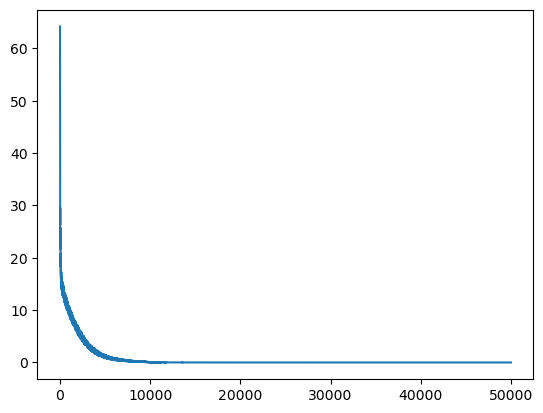

In [4]:
plt.plot(ave_losses.numpy())

# Continue training

Iteration: 0 Average Loss: 21.7436867
Iteration: 5000 Average Loss: 20.8558865
Iteration: 10000 Average Loss: 18.7777958
Iteration: 15000 Average Loss: 18.6318207
Iteration: 20000 Average Loss: 20.6844368
Iteration: 25000 Average Loss: 17.8237934
Iteration: 30000 Average Loss: 18.7303791
Iteration: 35000 Average Loss: 18.6392555
Iteration: 40000 Average Loss: 18.7503471
Iteration: 45000 Average Loss: 18.3629265
Time Elapsed: 7053.037449836731 s


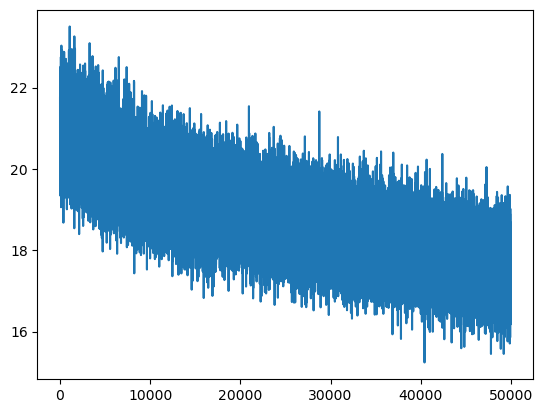

In [5]:
batch_size = tf.constant(500)
n_iterations = tf.constant(int(5e4))
check_loss_every_n_iterations = tf.constant(int(5e3))

start = time.time()
ave_losses = runner.train_agent(batch_size, n_iterations, check_loss_every_n_iterations)
time_elapsed = time.time() - start
print(f"Time Elapsed: {time_elapsed} s")

plt.plot(ave_losses.numpy())

In [5]:
# batch_size = tf.constant(int((grid_length ** grid_dim) * 100))
batch_size = tf.constant(int(5e4))

agent_distr = runner.get_normalized_agent_sample_distribution(batch_size)

n_unique_samples = tf.shape(tf.where(agent_distr))[0]
frac_unique_coords = n_unique_samples / (grid_length ** grid_dim)
print(f"Percentage of coordinates sampled uniquely: {float(frac_unique_coords*100):.2f}%")

Percentage of coordinates sampled uniquely: 7.68%


In [6]:
env_distr = runner.env.rewards / tf.math.reduce_sum(runner.env.rewards)

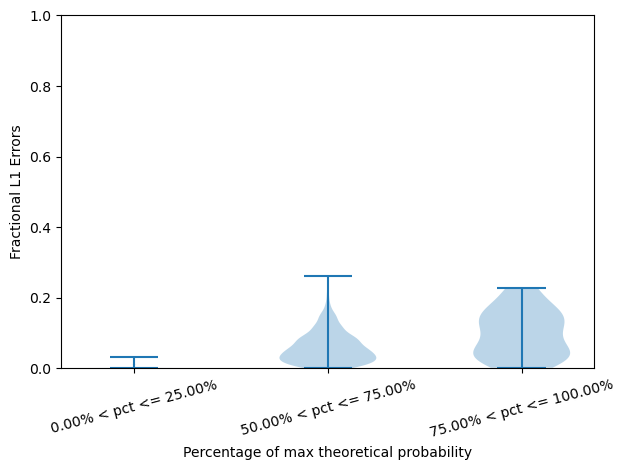

In [7]:
errors = _plot_l1_errors_per_probability_interval(
    agent_distr.numpy(), env_distr.numpy(), n_intervals=4
)

In [8]:
batch_size = tf.constant(int(5e5))

agent_distr = runner.get_normalized_agent_sample_distribution(batch_size)

n_unique_samples = tf.shape(tf.where(agent_distr))[0]
frac_unique_coords = n_unique_samples / (grid_length ** grid_dim)
print(f"Percentage of coordinates sampled uniquely: {float(frac_unique_coords*100):.2f}%")

Percentage of coordinates sampled uniquely: 39.11%


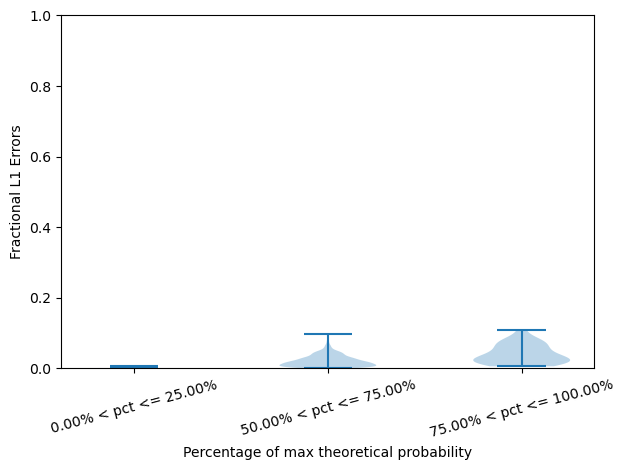

In [9]:
errors = _plot_l1_errors_per_probability_interval(
    agent_distr.numpy(), env_distr.numpy(), n_intervals=4
)

# Continue training

Iteration: 0 Average Loss: 0.00392136071
Iteration: 1000 Average Loss: 0.00286604813
Iteration: 2000 Average Loss: 0.00258166785
Iteration: 3000 Average Loss: 0.00212275
Iteration: 4000 Average Loss: 0.00306620449
Iteration: 5000 Average Loss: 0.00198702374
Iteration: 6000 Average Loss: 0.00221934798
Iteration: 7000 Average Loss: 0.00198664749
Iteration: 8000 Average Loss: 0.00165868737
Iteration: 9000 Average Loss: 0.00160076877
Iteration: 10000 Average Loss: 0.00201226654
Iteration: 11000 Average Loss: 0.00191810459
Iteration: 12000 Average Loss: 0.00132538786
Iteration: 13000 Average Loss: 0.0016924378
Iteration: 14000 Average Loss: 0.00174870028
Iteration: 15000 Average Loss: 0.0015236754
Iteration: 16000 Average Loss: 0.00188353611
Iteration: 17000 Average Loss: 0.00120660115
Iteration: 18000 Average Loss: 0.00155853631
Iteration: 19000 Average Loss: 0.00270514097
Iteration: 20000 Average Loss: 0.00152841851
Iteration: 21000 Average Loss: 0.00131639186
Iteration: 22000 Average Los

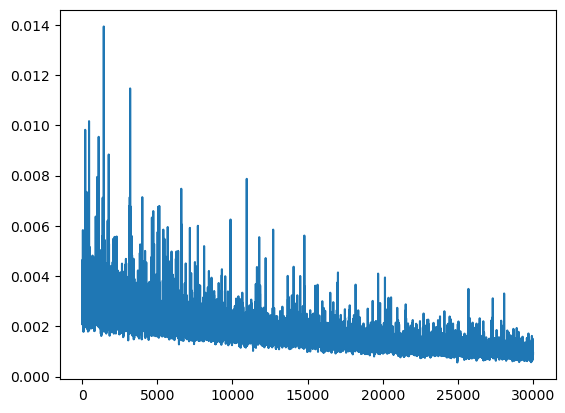

In [39]:
batch_size = tf.constant(500)
n_iterations = tf.constant(int(3e4))
check_loss_every_n_iterations = tf.constant(int(1e3))

start = time.time()
ave_losses = runner.train_agent(batch_size, n_iterations, check_loss_every_n_iterations)
time_elapsed = time.time() - start
print(f"Time Elapsed: {time_elapsed} s")

plt.plot(ave_losses.numpy())

In [40]:
batch_size = tf.constant(int(5e4))

agent_distr = runner.get_normalized_agent_sample_distribution(batch_size)

n_unique_samples = tf.shape(tf.where(agent_distr))[0]
frac_unique_coords = n_unique_samples / (grid_length ** grid_dim)
print(f"Percentage of coordinates sampled uniquely: {float(frac_unique_coords*100):.2f}%")

Percentage of coordinates sampled uniquely: 7.27%


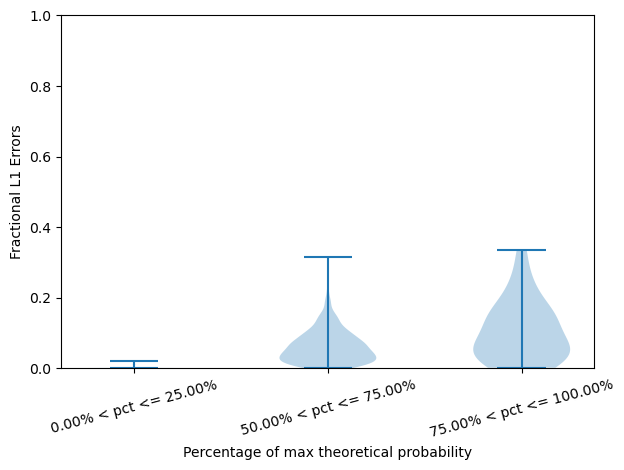

In [41]:
errors = _plot_l1_errors_per_probability_interval(
    agent_distr.numpy(), env_distr.numpy(), n_intervals=4
)

In [42]:
batch_size = tf.constant(int(5e5))

agent_distr = runner.get_normalized_agent_sample_distribution(batch_size)

n_unique_samples = tf.shape(tf.where(agent_distr))[0]
frac_unique_coords = n_unique_samples / (grid_length ** grid_dim)
print(f"Percentage of coordinates sampled uniquely: {float(frac_unique_coords*100):.2f}%")

Percentage of coordinates sampled uniquely: 38.68%


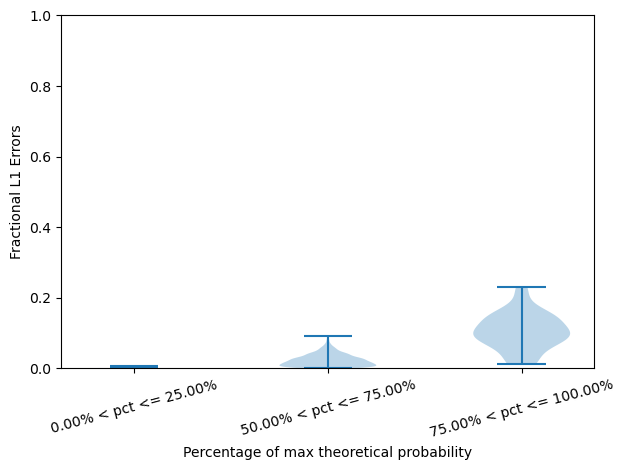

In [43]:
errors = _plot_l1_errors_per_probability_interval(
    agent_distr.numpy(), env_distr.numpy(), n_intervals=4
)

Iteration: 0 Average Loss: 0.000842266832
Iteration: 1000 Average Loss: 0.000782635936
Iteration: 2000 Average Loss: 0.000654832693
Iteration: 3000 Average Loss: 0.000625566696
Iteration: 4000 Average Loss: 0.000696642848
Iteration: 5000 Average Loss: 0.000715069822
Iteration: 6000 Average Loss: 0.000514737
Iteration: 7000 Average Loss: 0.000580141
Iteration: 8000 Average Loss: 0.000640064594
Iteration: 9000 Average Loss: 0.000629164337
Time Elapsed: 3208.134793996811 s


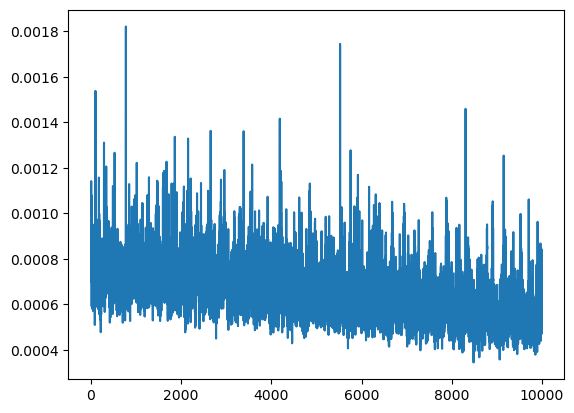

In [44]:
batch_size = tf.constant(1000)
n_iterations = tf.constant(int(1e4))
check_loss_every_n_iterations = tf.constant(int(1e3))

start = time.time()
ave_losses = runner.train_agent(batch_size, n_iterations, check_loss_every_n_iterations)
time_elapsed = time.time() - start
print(f"Time Elapsed: {time_elapsed} s")

plt.plot(ave_losses.numpy())

In [45]:
batch_size = tf.constant(int(5e4))

agent_distr = runner.get_normalized_agent_sample_distribution(batch_size)

n_unique_samples = tf.shape(tf.where(agent_distr))[0]
frac_unique_coords = n_unique_samples / (grid_length ** grid_dim)
print(f"Percentage of coordinates sampled uniquely: {float(frac_unique_coords*100):.2f}%")

Percentage of coordinates sampled uniquely: 7.51%


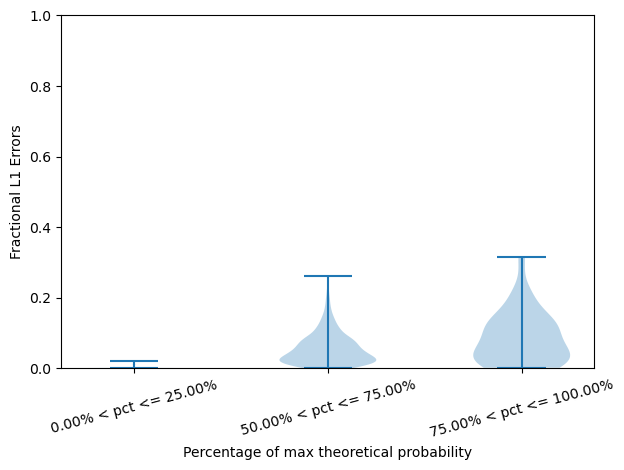

In [46]:
errors = _plot_l1_errors_per_probability_interval(
    agent_distr.numpy(), env_distr.numpy(), n_intervals=4
)

In [47]:
batch_size = tf.constant(int(5e5))

agent_distr = runner.get_normalized_agent_sample_distribution(batch_size)

n_unique_samples = tf.shape(tf.where(agent_distr))[0]
frac_unique_coords = n_unique_samples / (grid_length ** grid_dim)
print(f"Percentage of coordinates sampled uniquely: {float(frac_unique_coords*100):.2f}%")

Percentage of coordinates sampled uniquely: 39.01%


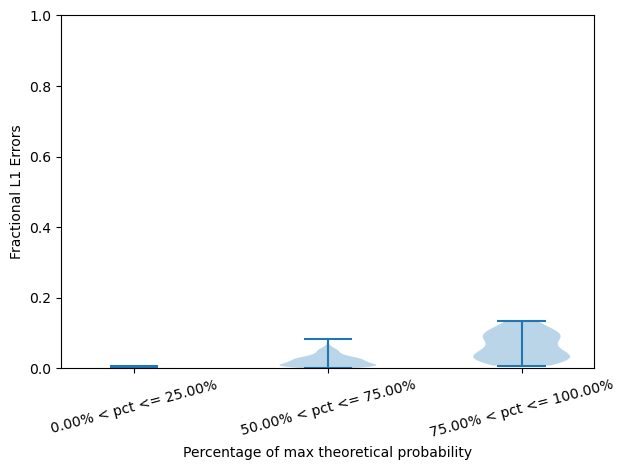

In [48]:
errors = _plot_l1_errors_per_probability_interval(
    agent_distr.numpy(), env_distr.numpy(), n_intervals=4
)